# Random Variates

## Preliminaries

In [4]:
using Pkg

PROJ_DIR = dirname(pwd())

Pkg.activate(PROJ_DIR)
Pkg.resolve()
Pkg.instantiate()

  Activating environment at `~/Github/RandomVariates.jl/Project.toml`
  No Changes to `~/Github/RandomVariates.jl/Project.toml`
  No Changes to `~/Github/RandomVariates.jl/Manifest.toml`
Precompiling project...
  ✓ RandomVariates
  1 dependency successfully precompiled in 4 seconds (121 already precompiled)


In [5]:
using Random
using RandomVariates
using Statistics
using Distributions
using HypothesisTests
using Gadfly
import Cairo, Fontconfig

┌ Info: Precompiling RandomVariates [345a731f-e7b6-46b5-981e-9c1174fc0482]
└ @ Base loading.jl:1342
┌ Warning: Package RandomVariates does not have LinearAlgebra in its dependencies:
│ - If you have RandomVariates checked out for development and have
│   added LinearAlgebra as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RandomVariates
└ Loading LinearAlgebra into RandomVariates from project dependency, future warnings for RandomVariates are suppressed.


In [1]:
n = 100000000
small_n = 10000

10000

In [22]:
function run_tests(dist, rng, args...)
    ad = []
    ww = []
    bp = []
    for _ in 1:5
        X = convert.(Float64, vec(rng(args...)))
        Y = convert.(Float64, vec(rand(dist, args[end])))
        append!(ad, pvalue(KSampleADTest(X, Y)))
        append!(ww, pvalue(WaldWolfowitzTest(X)))
        append!(bp, pvalue(BoxPierceTest(X, 30)))
    end
    return Dict(
        "Anderson-Darling" => mean(ad), 
        "Wald-Wolfowitz" => mean(ww),
        "Box-Pierce" => mean(bp),
    )
end

run_tests (generic function with 1 method)

## Uniform RNG Tests

In [6]:
x = uniform_rng(0, 1, n)
d = Uniform()

Uniform{Float64}(a=0.0, b=1.0)

In [28]:
OneSampleADTest(x, d)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.5821

Details:
    number of observations:   100000000
    sample mean:              0.5000188355019856
    sample SD:                0.28866186332332255
    A² statistic:             0.6726255017235477


In [29]:
ExactOneSampleKSTest(x, d)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          7.99029e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5457

Details:
    number of observations:   100000000


In [30]:
WaldWolfowitzTest(x)

Wald-Wolfowitz Test
-------------------
Population details:
    parameter of interest:   Number of runs
    value under h_0:         5.0e7
    point estimate:          49995911

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4134

Details:
    number of runs:  49995911
    z-statistic:     -0.8180000040900001


In [31]:
BoxPierceTest(x, 30)

Box-Pierce autocorrelation test
-------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.8776

Details:
    number of observations:         100000000
    number of lags:                 30
    degrees of freedom correction:  0
    Q statistic:                    21.3216


In [32]:
run_tests(d, uniform_rng, 0, 1, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.557141
  "Box-Pierce"       => 0.585516
  "Wald-Wolfowitz"   => 0.501395

Uniform{Float64}(a=5.1669318217761884e-5, b=0.9999101215398376)

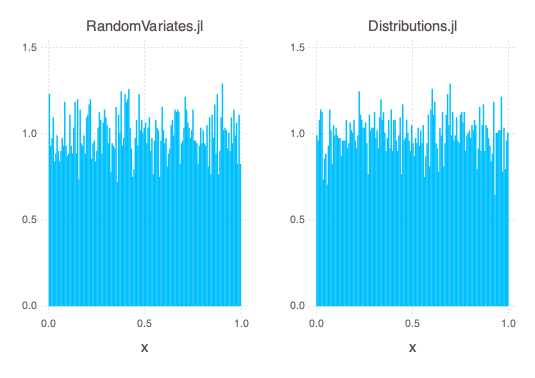

In [7]:
x = uniform_rng(0,1, small_n)
d = Uniform(0,1)
y = rand(d, small_n)
xmin, xmax = (0,1)
ymax = nothing

print(fit(Uniform, x))

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [8]:
ps |> SVG("std_uniform.svg", 5inch, 3inch)

false

Uniform{Float64}(a=1.0002785966205998, b=3.999153161754574)

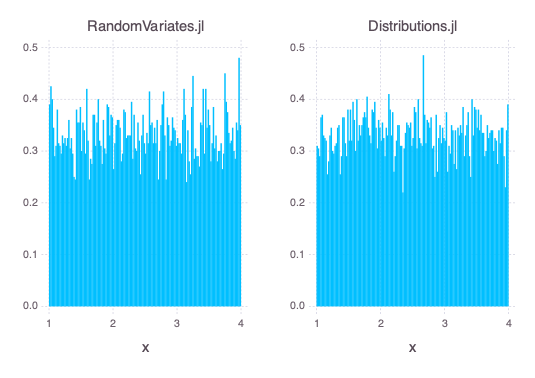

In [119]:
x = uniform_rng(1,4, small_n)
d = Uniform(1,4)
y = rand(d, small_n)
xmin, xmax = (1, 4)
ymax = nothing

print(fit(Uniform, x))

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [120]:
ps |> SVG("uniform.svg", 5inch, 3inch)

false

## Normal RNG Tests

In [115]:
x = normal_rng(0, 1, n)
d = Normal()  # !! Distributions.jl parameterizes the Normal with StdDev, not Var

Normal{Float64}(μ=0.0, σ=1.0)

In [70]:
OneSampleADTest(x, d)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.3052

Details:
    number of observations:   100000000
    sample mean:              -3.08659213113357e-5
    sample SD:                0.9998918156610231
    A² statistic:             1.1082102867353127


In [71]:
ExactOneSampleKSTest(x, d)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          9.51432e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3257

Details:
    number of observations:   100000000


In [72]:
WaldWolfowitzTest(x)

Wald-Wolfowitz Test
-------------------
Population details:
    parameter of interest:   Number of runs
    value under h_0:         5.0e7
    point estimate:          50005860

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2413

Details:
    number of runs:  50005860
    z-statistic:     1.1718000058590001


In [116]:
BoxPierceTest(x, 30)

Box-Pierce autocorrelation test
-------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.3401

Details:
    number of observations:         100000000
    number of lags:                 30
    degrees of freedom correction:  0
    Q statistic:                    32.6015


In [74]:
JarqueBeraTest(x)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.00026351232509467506 and 3.000551309518376"

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.2976

Details:
    number of observations:         100000000
    JB statistic:                   2.42374


In [75]:
run_tests(d, normal_rng, 0, 1, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.397882
  "Box-Pierce"       => 0.521738
  "Wald-Wolfowitz"   => 0.433671

In [76]:
fit(Normal, x)

Normal{Float64}(μ=-3.0865921311335806e-5, σ=0.9998918106615605)

Normal{Float64}(μ=0.010371876176285327, σ=0.9855131406199904)

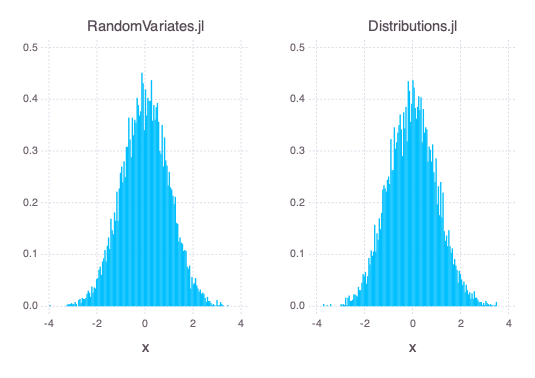

In [124]:
x = normal_rng(0,1, small_n)
d = Normal()   # !! Distributions.jl parameterizes the Normal with StdDev, not Var
y = rand(d, small_n)
xmin, xmax = (-4, 4)
ymax = nothing

print(fit(Normal, x))

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [125]:
ps |> SVG("std_normal.svg", 5inch, 3inch)

false

Normal{Float64}(μ=3.0178282255353626, σ=2.008276253300515)

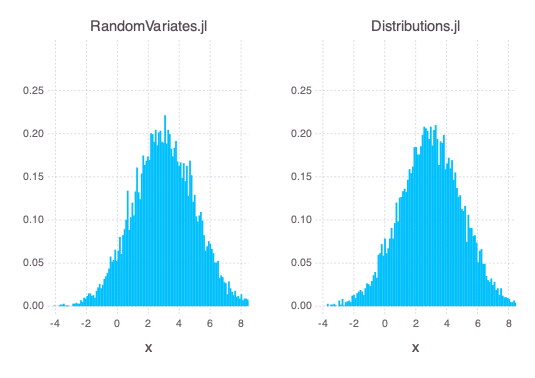

In [89]:
x = normal_rng(3,4, small_n)
d = Normal(3,2)   # !! Distributions.jl parameterizes the Normal with StdDev, not Var
y = rand(d, small_n)
xmin, xmax = (-4, 8)
ymax = .3

print(fit(Normal, x))

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [ ]:
ps |> SVG("normal.svg", 5inch, 3inch)

## Poisson RNG Tests

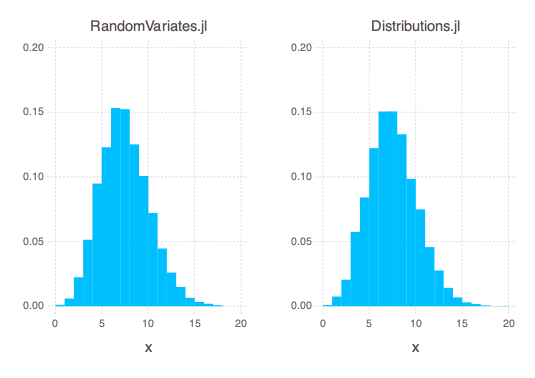

In [90]:
x = poisson_rng(7, small_n)
d = Poisson(7)
y = rand(d, small_n)
xmin, xmax = (0, 20)
ymax = 0.2

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [ ]:
ps |> SVG("poisson.svg", 5inch, 3inch)

In [42]:
run_tests(d, poisson_rng, 7, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.719562
  "Box-Pierce"       => 0.460976
  "Wald-Wolfowitz"   => 0.325649

In [43]:
fit(Poisson, x)

Poisson{Float64}(λ=6.9805)

## Geometric RNG Tests

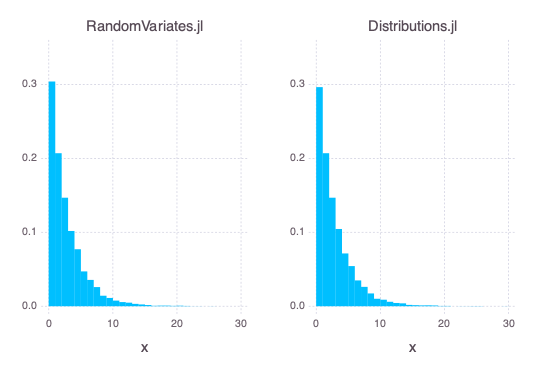

In [91]:
x = geometric_rng(.3, small_n)
d = Geometric(.3)
y = rand(d, small_n)

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=0, xmax=30, ymax=.35))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=0, xmax=30, ymax=.35))
ps = hstack(p1, p2)

In [ ]:
ps |> SVG("geometric.svg", 5inch, 3inch)

In [46]:
run_tests(d, geometric_rng, .3, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.511652
  "Box-Pierce"       => 0.614771
  "Wald-Wolfowitz"   => 0.588883

In [47]:
fit(Geometric, x)

Geometric{Float64}(p=0.29968832414289137)

## Binomial RNG Tests

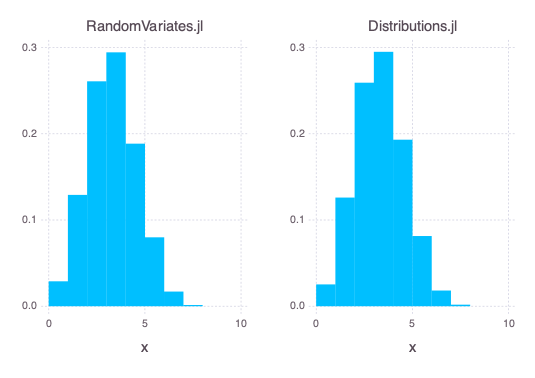

In [92]:
x = binomial_rng(.4, 7, small_n)
d = Binomial(7, .4)
y = rand(d, small_n)
xmin, xmax = (0, 10)
ymax = nothing

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [ ]:
ps |> SVG("binomial.svg", 5inch, 3inch)

In [50]:
run_tests(d, binomial_rng, .4, 7, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.731834
  "Box-Pierce"       => 0.388361
  "Wald-Wolfowitz"   => 0.413401

In [51]:
fit(Binomial, 7, vec(x))

Binomial{Float64}(n=7, p=0.39822857142857143)

## Gamma RNG Tests


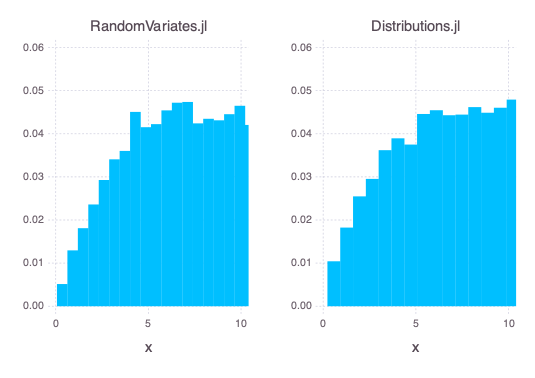

In [93]:
# x = expon_rng(1, 10000)  # Interesting! Expon(1) ~ Gamma(1,1) 
x = gamma_rng(2,8,small_n)
d = Gamma(2,8)
y = rand(d, small_n)
xmin, xmax = (0, 10)
ymax = 0.06

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [94]:
ps |> SVG("gamma.svg", 5inch, 3inch)

false

In [53]:
run_tests(d, gamma_rng, 2, 8, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.452706
  "Box-Pierce"       => 0.425702
  "Wald-Wolfowitz"   => 0.569881

In [54]:
fit(Gamma, vec(x))

Gamma{Float64}(α=1.9344267380773177, θ=8.18449234498118)

## Exponential RNG Tests


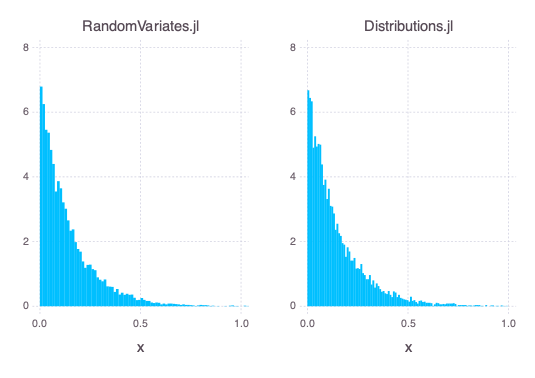

In [103]:
# x = expon_rng(1, 10000)  # Interesting! Expon(1) ~ Gamma(1,1) 
x = expon_rng(7,small_n)
d = Exponential(1/7)  # Distributions.jl parameterizes differently
y = rand(d, small_n)
xmin, xmax = (0, 1)
ymax = nothing

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
ps = hstack(p1, p2)

In [104]:
ps |> SVG("exponential.svg", 5inch, 3inch)

false

In [105]:
run_tests(d, expon_rng, 7, small_n)

Dict{String, Float64} with 3 entries:
  "Anderson-Darling" => 0.520655
  "Box-Pierce"       => 0.768136
  "Wald-Wolfowitz"   => 0.591481

In [110]:
fit(Exponential, vec(x))

Exponential{Float64}(θ=0.14173146946226658)

In [113]:
1/0.14173146946226658

7.0555960775262525